<a href="https://colab.research.google.com/github/minicks/Deeplearning/blob/main/2.FNN/AI%EB%8A%94_%EC%B2%B4%EA%B2%A9%EC%9D%84_%EB%B3%B4%EA%B3%A0_%EC%B4%88%C2%B7%EC%A4%91%C2%B7%EA%B3%A0%EB%93%B1%ED%95%99%EC%83%9D%EC%9D%84_%EA%B5%AC%EB%B6%84%ED%95%A0_%EC%88%98_%EC%9E%88%EC%9D%84%EA%B9%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
"""
Author : Byunghyun Ban
Date : 2020.07.24.
"""
import os
os.listdir("drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[5장] 분류(Classification) 기법 활용하기/2_5_1_AI는 체격을 보고 초, 중, 고등학생을 구분할 수 있을까")
from tensorflow import keras


In [6]:
cd /content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[5장] 분류(Classification) 기법 활용하기/2_5_1_AI는 체격을 보고 초, 중, 고등학생을 구분할 수 있을까

/content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[5장] 분류(Classification) 기법 활용하기/2_5_1_AI는 체격을 보고 초, 중, 고등학생을 구분할 수 있을까


In [7]:
import data_reade

In [8]:
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 20  # 예제 기본값은 20입니다.

In [9]:
# 데이터를 읽어옵니다.
dr = data_reade.DataReader()



Data Read Done!
Training X Size : (7745, 3)
Training Y Size : (7745,)
Test X Size : (1937, 3)
Test Y Size : (1937,)




In [10]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation='softmax')
])

In [11]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
# 인공신경망을 학습시킵니다.
print("************ TRAINING START ************")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

************ TRAINING START ************
Epoch 1/20
243/243 [==============================] - 1s 2ms/step - loss: 1.0243 - accuracy: 0.5349 - val_loss: 0.9144 - val_accuracy: 0.6469
Epoch 2/20
243/243 [==============================] - 0s 2ms/step - loss: 0.8185 - accuracy: 0.6544 - val_loss: 0.7309 - val_accuracy: 0.6732
Epoch 3/20
243/243 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.6675 - val_loss: 0.6997 - val_accuracy: 0.6438
Epoch 4/20
243/243 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.6649 - val_loss: 0.6758 - val_accuracy: 0.6856
Epoch 5/20
243/243 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6718 - val_loss: 0.6678 - val_accuracy: 0.6897
Epoch 6/20
243/243 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6750 - val_loss: 0.6592 - val_accuracy: 0.6908
Epoch 7/20
243/243 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6835 - val_l

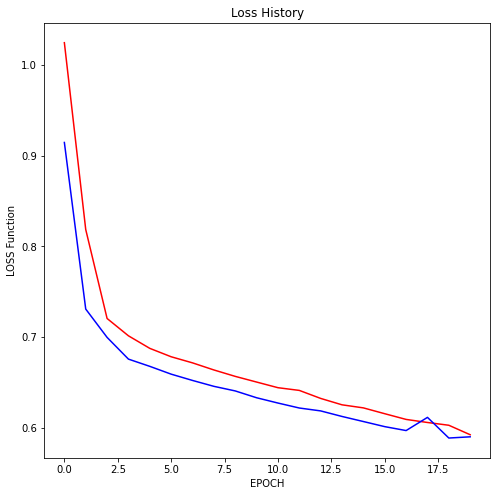

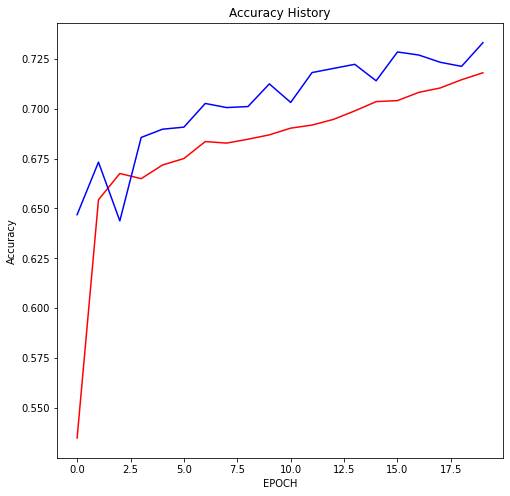

In [14]:
# 학습 결과를 그래프로 출력합니다.
data_reade.draw_graph(history)